## Reading and understanding the data

In [1]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data we need to make predictions on
data = pd.read_csv('/Users/mamta/Downloads/bank-marketing-uci/bank.csv', sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
data.shape

(4521, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# checking the numerical variables 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
# Renaming the target variable from 'y' to 'target' 
data.rename(columns={'y':'target'}, inplace = True)

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
# Inspecting the categorical variables 
cat_col = data.select_dtypes('object').columns
for col in cat_col:
    print('value_counts for column:', col)
    print(round(data[col].value_counts(normalize=True)*100, 2))
    print('-------------------------------------')

value_counts for column: job
management       21.43
blue-collar      20.92
technician       16.99
admin.           10.57
services          9.22
retired           5.09
self-employed     4.05
entrepreneur      3.72
unemployed        2.83
housemaid         2.48
student           1.86
unknown           0.84
Name: job, dtype: float64
-------------------------------------
value_counts for column: marital
married     61.87
single      26.45
divorced    11.68
Name: marital, dtype: float64
-------------------------------------
value_counts for column: education
secondary    51.01
tertiary     29.86
primary      15.00
unknown       4.14
Name: education, dtype: float64
-------------------------------------
value_counts for column: default
no     98.32
yes     1.68
Name: default, dtype: float64
-------------------------------------
value_counts for column: housing
yes    56.6
no     43.4
Name: housing, dtype: float64
-------------------------------------
value_counts for column: loan
no     84.72


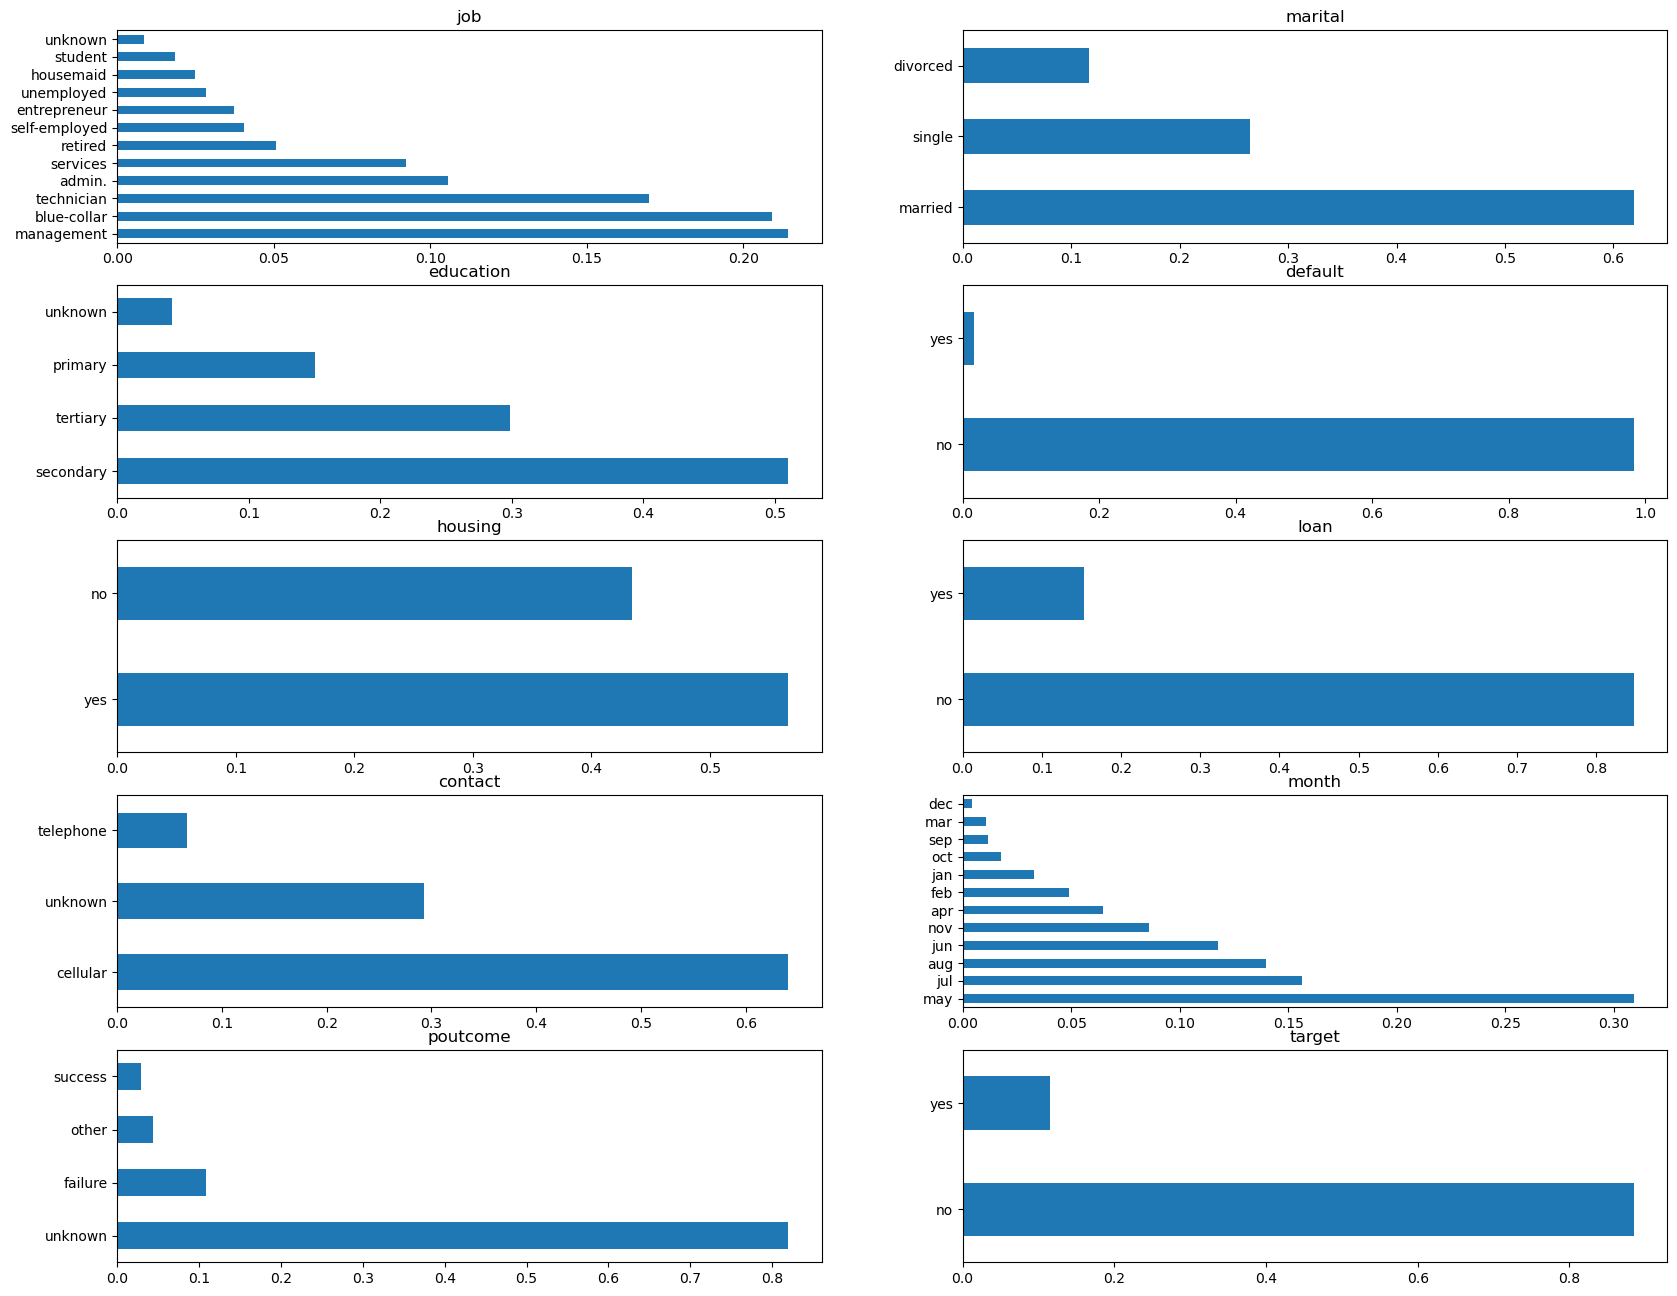

In [9]:
plt.figure(figsize=[20,16])
for ind, col in enumerate(cat_col):
    plt.subplot(5,2,ind+1)
    data[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

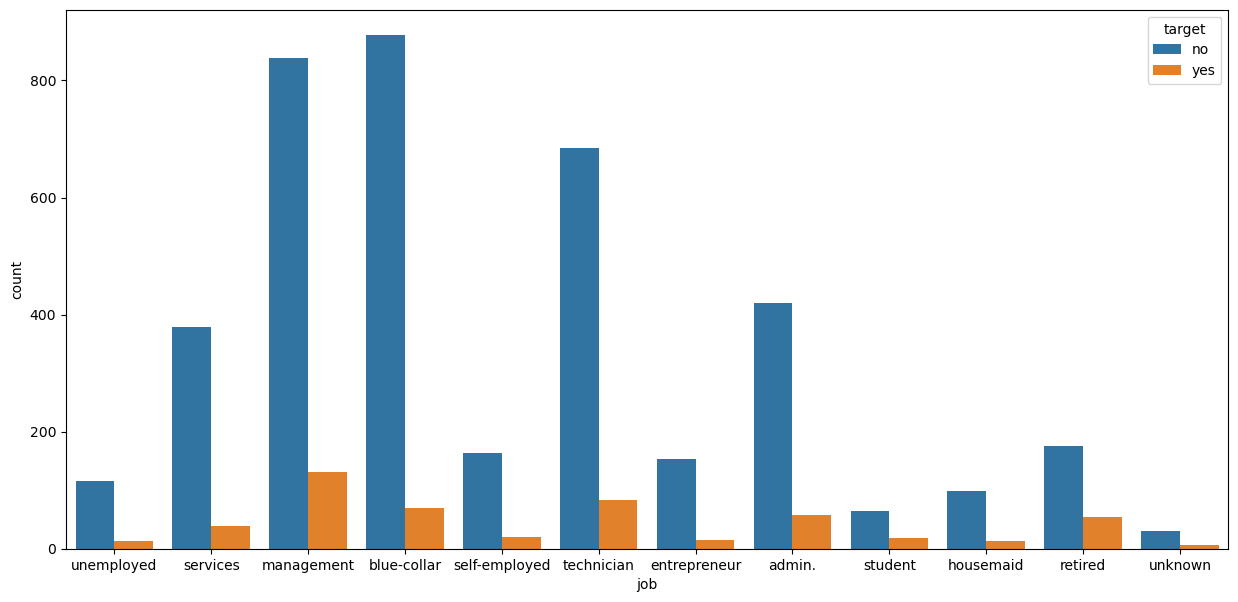

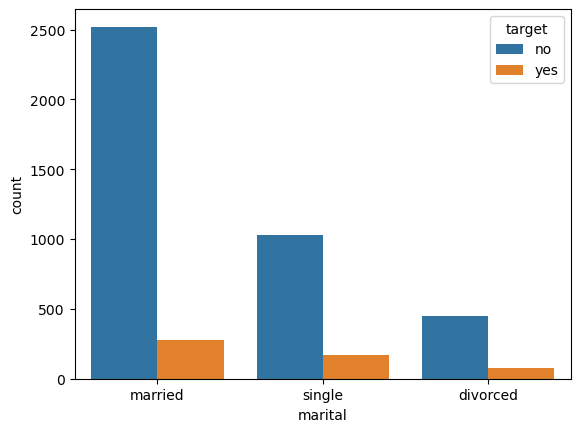

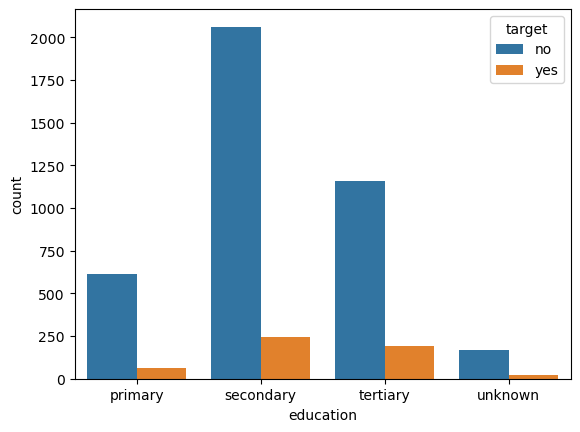

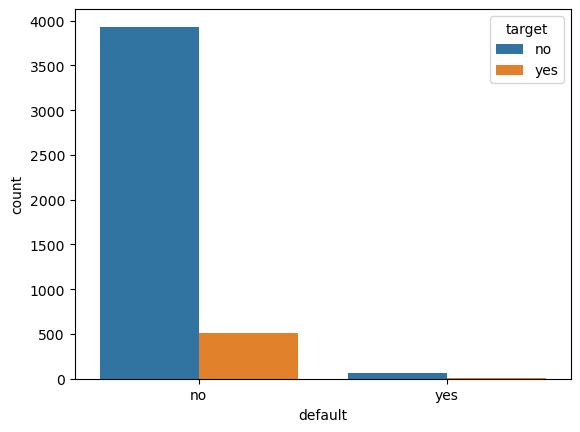

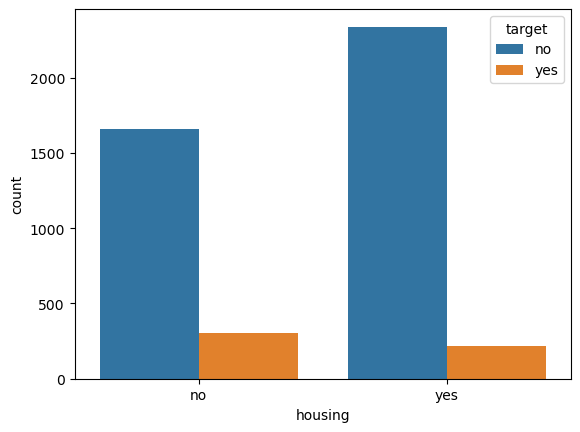

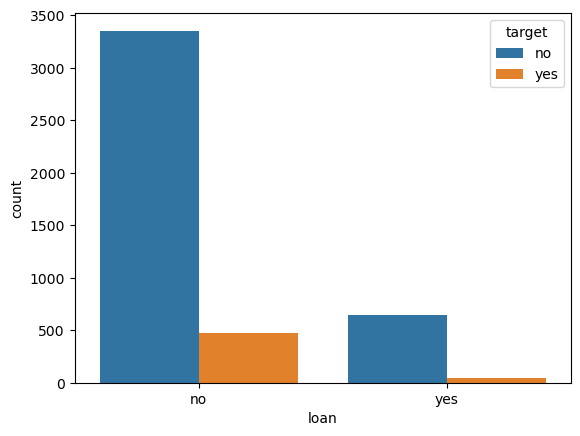

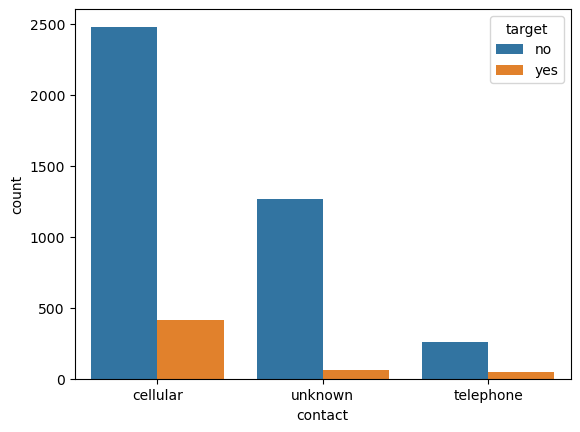

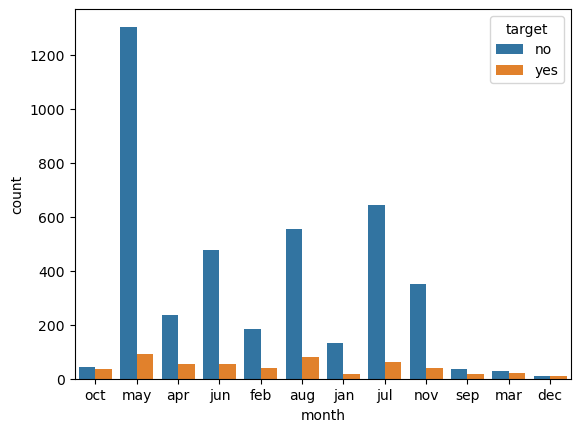

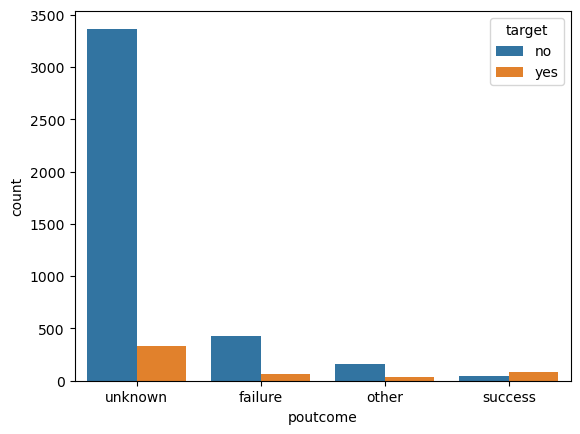

In [10]:
plt.figure(figsize=[15,7])
for col in cat_col:
    if col!= 'target':
        sns.countplot(data = data, x = col, hue = 'target')
        plt.show()

#### Dropping columns 'day' and 'duration'

In [11]:
data1 = data.drop(['day','duration', 'default'], axis = 1)

In [12]:
num_cols = data1.select_dtypes('number').columns

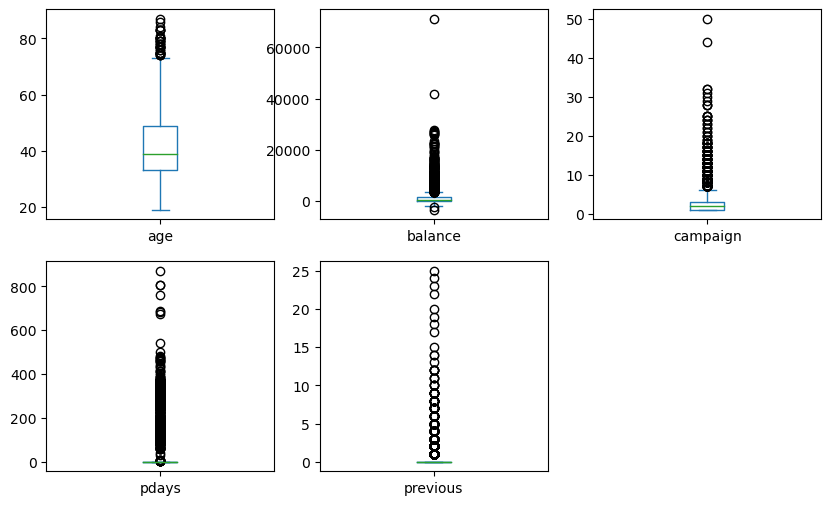

In [13]:
plt.figure(figsize=(10,6))
for ind, col in enumerate(num_cols):
    plt.subplot(2,3,ind+1)
    data1[col].plot.box()
plt.show()

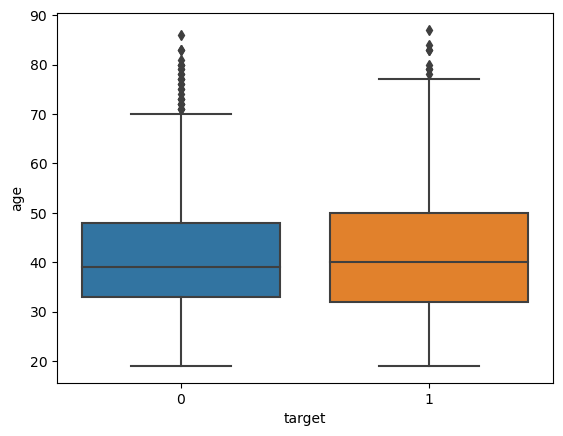

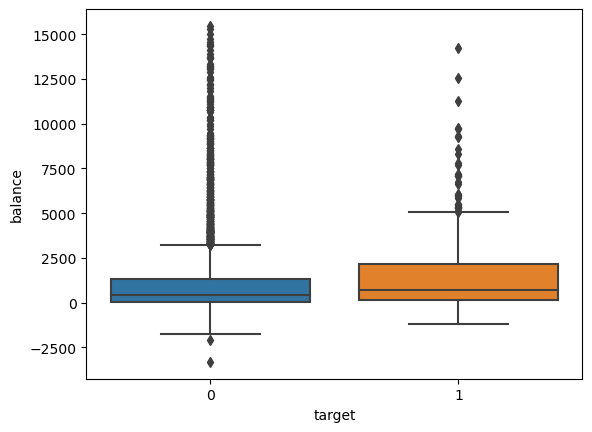

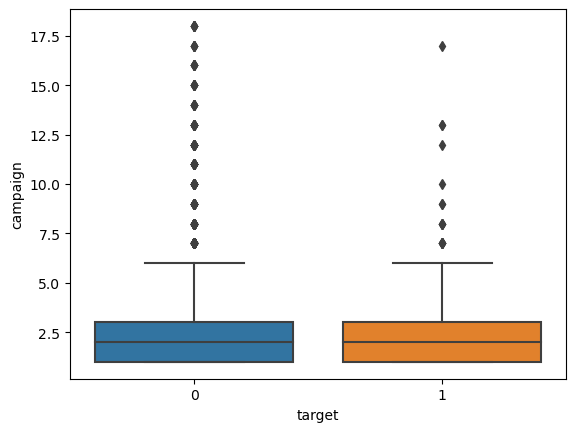

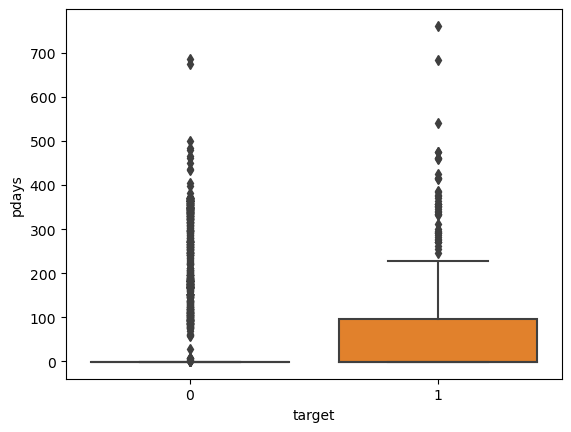

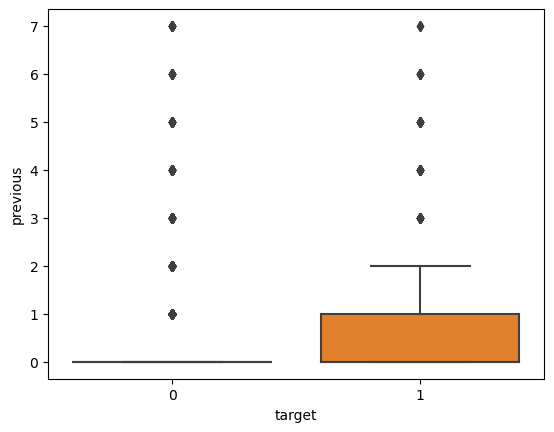

In [132]:
for col in num_cols:
    sns.boxplot(x = data1['target'], y = data1[col])
    plt.show()

### Outlier Handling

In [14]:
# campaign

Q1 = data1.campaign.quantile(0.05)
Q3 = data1.campaign.quantile(0.95)
IQR = Q3 - Q1
data1 = data1[(data1.campaign >= Q1 - 1.5*IQR) & (data1.campaign <= Q3 + 1.5*IQR)]

In [15]:
data1.shape

(4492, 14)

In [16]:
# pdays

Q1 = data1.pdays.quantile(0.05)
Q3 = data1.pdays.quantile(0.95)
IQR = Q3 - Q1
data1 = data1[(data1.pdays >= Q1 - 1.5*IQR) & (data1.pdays <= Q3 + 1.5*IQR)]

In [17]:
data1.shape

(4489, 14)

In [18]:
# previous 

Q1 = data1.previous.quantile(0.05)
Q3 = data1.previous.quantile(0.95)
IQR = Q3 - Q1
data1 = data1[(data1.previous >= Q1 - 1.5*IQR) & (data1.previous <= Q3 + 1.5*IQR)]


In [19]:
data1.shape

(4438, 14)

In [20]:
# balance 

Q1 = data1.balance.quantile(0.05)
Q3 = data1.balance.quantile(0.95)
IQR = Q3 - Q1
data1 = data1[(data1.balance >= Q1 - 1.5*IQR) & (data1.balance <= Q3 + 1.5*IQR)]

In [21]:
data1.shape

(4401, 14)

## Data Preprocessing 

#### Creating dummy variables for categorical variables 

In [22]:
# handling default, housing, loan and target
cols = ['housing', 'loan', 'target']

data1[cols] = data1[cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))
data1.head()

,age,job,marital,education,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,1787,0,0,cellular,oct,1,-1,0,unknown,0
1,33,services,married,secondary,4789,1,1,cellular,may,1,339,4,failure,0
2,35,management,single,tertiary,1350,1,0,cellular,apr,1,330,1,failure,0
3,30,management,married,tertiary,1476,1,1,unknown,jun,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,1,0,unknown,may,1,-1,0,unknown,0


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

data1['education'] = le.fit_transform(data1['education'])
data1['month'] = le.fit_transform(data1['month'])

In [25]:
data1.head()

,age,job,marital,education,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,0,1787,0,0,cellular,10,1,-1,0,unknown,0
1,33,services,married,1,4789,1,1,cellular,8,1,339,4,failure,0
2,35,management,single,2,1350,1,0,cellular,0,1,330,1,failure,0
3,30,management,married,2,1476,1,1,unknown,6,4,-1,0,unknown,0
4,59,blue-collar,married,1,0,1,0,unknown,8,1,-1,0,unknown,0


In [26]:
# creating dummy variables for job, marital, education, contact, month, poutcome
dummy_cols = ['job', 'marital', 'contact', 'poutcome']

dummies = pd.get_dummies(data1[dummy_cols], drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [27]:
pd.set_option('display.max_columns', 50)

In [28]:
data2 = pd.concat([data1, dummies], axis = 1)
data2.head()

,age,job,marital,education,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,0,1787,0,0,cellular,10,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,33,services,married,1,4789,1,1,cellular,8,1,339,4,failure,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,35,management,single,2,1350,1,0,cellular,0,1,330,1,failure,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,30,management,married,2,1476,1,1,unknown,6,4,-1,0,unknown,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,59,blue-collar,married,1,0,1,0,unknown,8,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [29]:
data2.drop(dummy_cols, axis = 1, inplace = True)

In [30]:
data2.head()

,age,education,balance,housing,loan,month,campaign,pdays,previous,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,10,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,33,1,4789,1,1,8,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,35,2,1350,1,0,0,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,30,2,1476,1,1,6,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,59,1,0,1,0,8,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [31]:
data2.shape

(4401, 28)

## Model Building 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
X = data2.drop('target', axis = 1)
y = data2['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42, stratify=y)

In [35]:
X_train.shape, X_test.shape

((3520, 27), (881, 27))

In [36]:
y_train.value_counts(normalize=True)

0    0.884943
1    0.115057
Name: target, dtype: float64

In [37]:
y_test.value_counts(normalize=True)

0    0.885358
1    0.114642
Name: target, dtype: float64

In [38]:
## scaling the numerical variables 
scaler = MinMaxScaler()

cols = ['age', 'education', 'balance', 'month', 'campaign', 'pdays', 'previous']

X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,age,education,balance,housing,loan,month,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
315,0.161765,0.000000,0.246644,1,0,0.727273,0.058824,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3037,0.485294,0.333333,0.177072,1,0,0.727273,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
2233,0.073529,0.333333,0.416205,1,0,0.727273,0.058824,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3176,0.132353,0.333333,0.429256,0,0,0.727273,0.000000,0.238845,0.714286,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3129,0.338235,1.000000,0.176486,0,0,0.454545,0.058824,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
X_train.describe()

,age,education,balance,housing,loan,month,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000
mean,0.325259,0.410795,0.241475,0.565909,0.152273,0.500568,0.095271,0.050272,0.058523,0.209943,0.036932,0.025852,0.212500,0.052557,0.040909,0.093466,0.018466,0.170455,0.027273,0.008239,0.617614,0.265909,0.064205,0.294602,0.037500,0.028125,0.830682
std,0.156258,0.248383,0.113185,0.495707,0.359336,0.273513,0.140591,0.127205,0.160055,0.407326,0.188621,0.158717,0.409135,0.223179,0.198108,0.291126,0.134648,0.376085,0.162900,0.090405,0.486039,0.441879,0.245152,0.455929,0.190011,0.165353,0.375086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,0.333333,0.180002,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.294118,0.333333,0.199233,1.000000,0.000000,0.545455,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.441176,0.666667,0.248748,1.000000,0.000000,0.727273,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,age,education,balance,housing,loan,month,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
428,0.191176,0.333333,0.302525,1,0,0.727273,0.058824,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4424,0.220588,0.666667,0.259429,1,1,0.727273,0.000000,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2288,0.455882,0.333333,0.251705,0,0,0.090909,0.117647,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3219,0.779412,0.000000,0.217132,0,0,0.000000,0.058824,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1926,0.176471,0.333333,0.197315,0,0,0.090909,0.058824,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


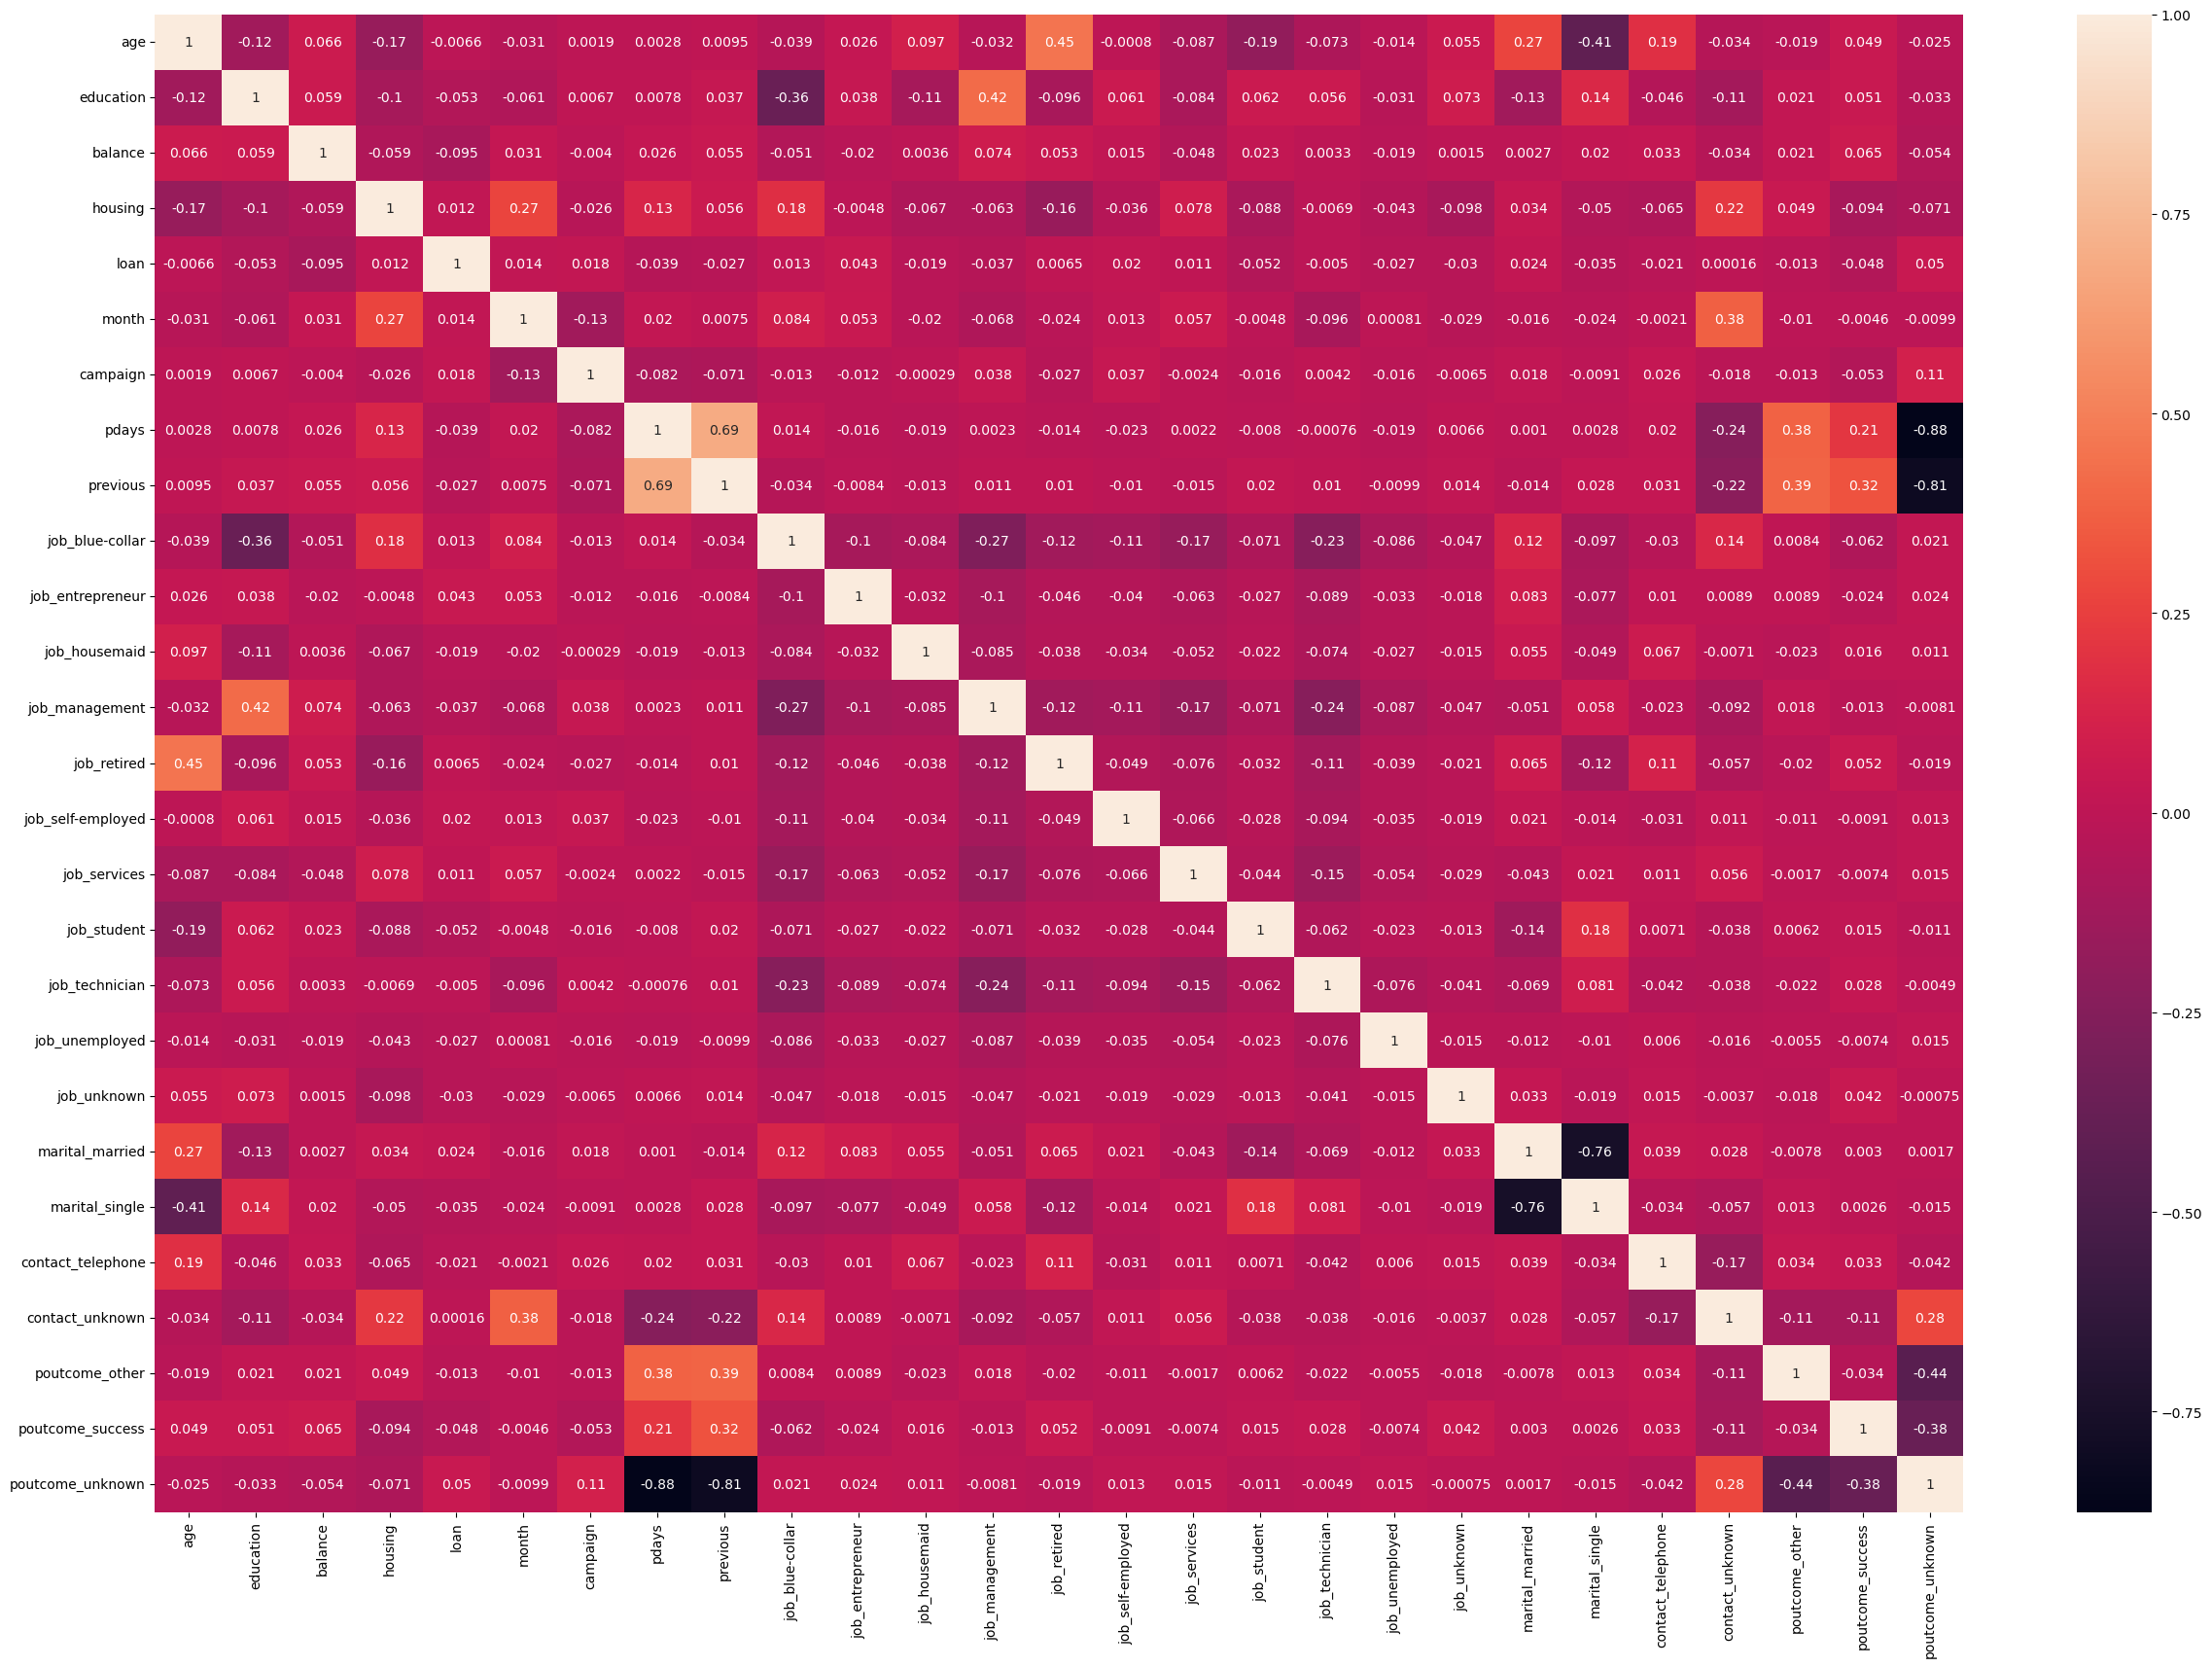

In [41]:
plt.figure(figsize=(30, 20))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [42]:
## Dropping highly correlated columns 

drop_cols = ['poutcome_unknown', 'marital_single', 'previous']

In [43]:
X_train = X_train.drop(drop_cols, axis = 1)
X_test = X_test.drop(drop_cols, axis = 1)

## Using Logistic Regression Model 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score

In [45]:
logreg = LogisticRegression(random_state=42)

In [46]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [47]:
y_test_pred = logreg.predict(X_test)

In [48]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.8933030646992054
F1 score:  0.21666666666666667
Recall:  0.12871287128712872
Precision:  0.6842105263157895

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       780
           1       0.68      0.13      0.22       101

    accuracy                           0.89       881
   macro avg       0.79      0.56      0.58       881
weighted avg       0.87      0.89      0.86       881


 confussion matrix:
 [[774   6]
 [ 88  13]]


In [49]:
from sklearn.metrics import RocCurveDisplay

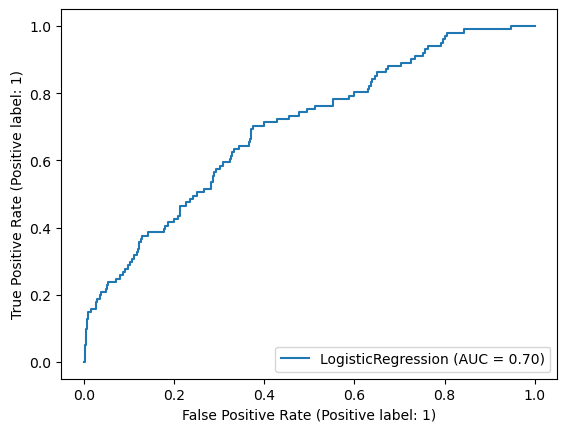

In [50]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

## Using Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [53]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [54]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.8910329171396141
F1 score:  0.2
Recall:  0.1188118811881188
Precision:  0.631578947368421

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       780
           1       0.63      0.12      0.20       101

    accuracy                           0.89       881
   macro avg       0.76      0.55      0.57       881
weighted avg       0.87      0.89      0.86       881


 confussion matrix:
 [[773   7]
 [ 89  12]]


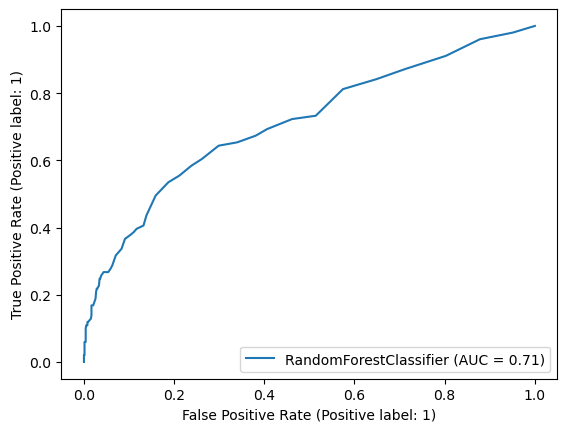

In [55]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

## Using Decision Trees 

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
y_test_pred = dt.predict(X_test)

In [59]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.8127128263337117
F1 score:  0.21052631578947367
Recall:  0.21782178217821782
Precision:  0.2037037037037037

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       780
           1       0.20      0.22      0.21       101

    accuracy                           0.81       881
   macro avg       0.55      0.55      0.55       881
weighted avg       0.82      0.81      0.82       881


 confussion matrix:
 [[694  86]
 [ 79  22]]


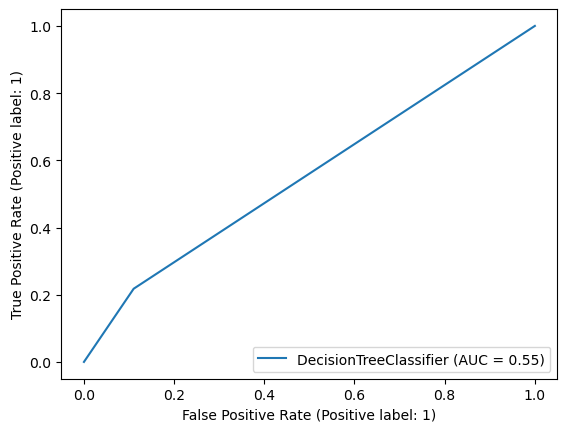

In [60]:
RocCurveDisplay.from_estimator(dt, X_test, y_test)

## Applying Data Imbalance techniques due to imbalance in the target variable 

### Oversampling

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [62]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])

In [63]:
params = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,200,20)),
    'classifier__max_features' : list(range(6,32,5)),
    'classifier__max_depth' : list(range(2, 20, 3))
    }
]

In [64]:
model_os = GridSearchCV(estimator= pipe, param_grid=params, cv = 5, n_jobs=-1, verbose=1, return_train_score = True)


In [65]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sample = RandomOverSampler(sampling_strategy=1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
print(len(X_resampled_os))
print(sorted(Counter(y_resampled_os).items()))

6230
[(0, 3115), (1, 3115)]


In [66]:
%%time
model_os.fit(X_resampled_os, y_resampled_os)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
CPU times: user 6.8 s, sys: 997 ms, total: 7.79 s
Wall time: 3min 53s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1....
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier(max_depth=17,
                                                                max_features=6,
                                                                n_estimators=130)],
                          'classifier__max_depth': [2, 5, 8, 11, 14, 17],
                          'classifier__max_features': [6, 11, 16, 21, 26, 31],
                          'classifier__n_estimators': [10, 30, 50, 70, 90, 110,
                                                       130, 150, 170, 190]}],
             return_train_score=True, verbose=1)

In [67]:
model_os.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=17, max_features=6,
                                        n_estimators=130))])

In [68]:
model_os.best_score_

0.9722311396468699

In [69]:
rf_best_os = model_os.best_estimator_

In [70]:
y_test_pred_os = rf_best_os.predict(X_test)

In [71]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_os))
print ('F1 score: ', f1_score(y_test, y_test_pred_os))
print ('Recall: ', recall_score(y_test, y_test_pred_os))
print ('Precision: ', precision_score(y_test, y_test_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_os))

Accuracy:  0.8751418842224744
F1 score:  0.30379746835443033
Recall:  0.2376237623762376
Precision:  0.42105263157894735

 clasification report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       780
           1       0.42      0.24      0.30       101

    accuracy                           0.88       881
   macro avg       0.66      0.60      0.62       881
weighted avg       0.85      0.88      0.86       881


 confussion matrix:
 [[747  33]
 [ 77  24]]


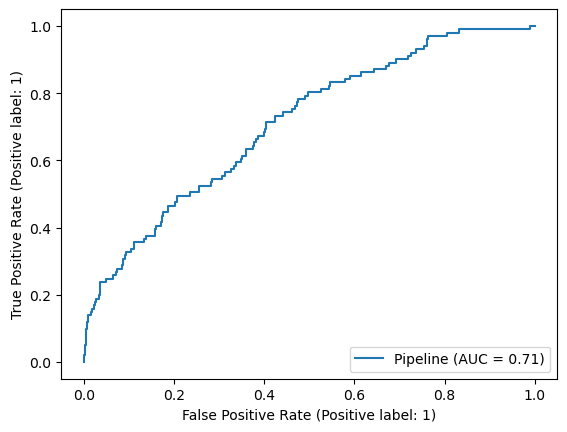

In [72]:
RocCurveDisplay.from_estimator(rf_best_os, X_test, y_test)


### Undersampling

In [73]:
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state=5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

810

In [74]:
from collections import Counter
print(sorted(Counter(y_resampled_us).items()))

[(0, 405), (1, 405)]


In [75]:
model_us = GridSearchCV(estimator= pipe, param_grid=params, cv = 5, n_jobs=-1, verbose=1, return_train_score = True)

In [76]:
%%time
model_us.fit(X_resampled_us, y_resampled_us)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
CPU times: user 5.01 s, sys: 335 ms, total: 5.35 s
Wall time: 1min 9s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1....
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier(max_depth=5,
                                                                max_features=11,
                                                                n_estimators=90)],
                          'classifier__max_depth': [2, 5, 8, 11, 14, 17],
                          'classifier__max_features': [6, 11, 16, 21, 26, 31],
                          'classifier__n_estimators': [10, 30, 50, 70, 90, 110,
                                                       130, 150, 170, 190]}],
             return_train_score=True, verbose=1)

In [77]:
rf_best_us = model_us.best_estimator_

In [78]:
y_test_pred_us = rf_best_us.predict(X_test)

In [79]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_us))
print ('F1 score: ', f1_score(y_test, y_test_pred_us))
print ('Recall: ', recall_score(y_test, y_test_pred_us))
print ('Precision: ', precision_score(y_test, y_test_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_us))

Accuracy:  0.7253121452894438
F1 score:  0.30857142857142855
Recall:  0.5346534653465347
Precision:  0.21686746987951808

 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83       780
           1       0.22      0.53      0.31       101

    accuracy                           0.73       881
   macro avg       0.57      0.64      0.57       881
weighted avg       0.84      0.73      0.77       881


 confussion matrix:
 [[585 195]
 [ 47  54]]


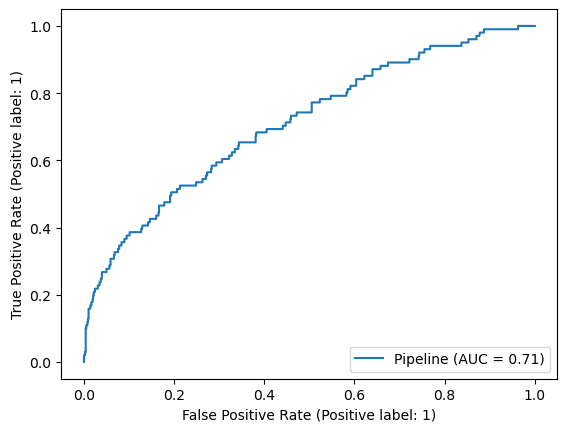

In [80]:
RocCurveDisplay.from_estimator(rf_best_us, X_test, y_test)

### SMOTE 

In [81]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)
print(sorted(Counter(y_resampled_smt).items()))

[(0, 3115), (1, 3115)]


In [82]:
model_smt = GridSearchCV(estimator= pipe, param_grid=params, cv = 4, n_jobs=-1, verbose=1, return_train_score = True)

In [83]:
%%time
model_smt.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits
CPU times: user 5.87 s, sys: 781 ms, total: 6.65 s
Wall time: 3min 49s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1....
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier(max_depth=17,
                                                                max_features=6,
                                                                n_estimators=150)],
                          'classifier__max_depth': [2, 5, 8, 11, 14, 17],
                          'classifier__max_features': [6, 11, 16, 21, 26, 31],
                          'classifier__n_estimators': [10, 30, 50, 70, 90, 110,
                                                       130, 150, 170, 190]}],
             return_train_score=True, verbose=1)

In [84]:
model_smt.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=17, max_features=6,
                                        n_estimators=150))])

In [85]:
rf_best_smt = model_smt.best_estimator_

In [86]:
y_test_pred_smt = rf_best_smt.predict(X_test)

In [87]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_smt))
print ('F1 score: ', f1_score(y_test, y_test_pred_smt))
print ('Recall: ', recall_score(y_test, y_test_pred_smt))
print ('Precision: ', precision_score(y_test, y_test_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_smt))

Accuracy:  0.8535754824063564
F1 score:  0.2793296089385475
Recall:  0.24752475247524752
Precision:  0.32051282051282054

 clasification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       780
           1       0.32      0.25      0.28       101

    accuracy                           0.85       881
   macro avg       0.61      0.59      0.60       881
weighted avg       0.84      0.85      0.85       881


 confussion matrix:
 [[727  53]
 [ 76  25]]


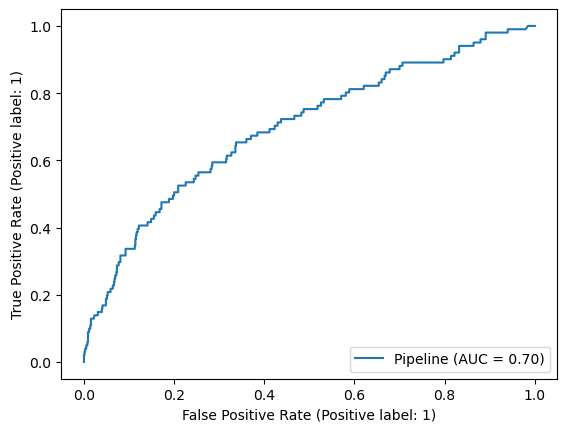

In [88]:
RocCurveDisplay.from_estimator(rf_best_smt, X_test, y_test)

## SMOTE+TOMEK

In [89]:
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)
print(sorted(Counter(y_resampled_smt_tmk).items()))


[(0, 3050), (1, 3050)]


In [90]:
model_smt_tmk = GridSearchCV(estimator= pipe, param_grid=params, cv = 4, n_jobs=-1, verbose=1, return_train_score = True)

In [91]:
%%time
model_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits
CPU times: user 6.08 s, sys: 774 ms, total: 6.85 s
Wall time: 3min 36s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1....
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier(max_depth=17,
                                                                max_features=6,
                                                                n_estimators=190)],
                          'classifier__max_depth': [2, 5, 8, 11, 14, 17],
                          'classifier__max_features': [6, 11, 16, 21, 26, 31],
                          'classifier__n_estimators': [10, 30, 50, 70, 90, 110,
                                                       130, 150, 170, 190]}],
             return_train_score=True, verbose=1)

In [92]:
model_smt_tmk.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=17, max_features=6,
                                        n_estimators=190))])

In [93]:
rf_best_smt_tmk = model_smt_tmk.best_estimator_

In [94]:
y_test_pred_smt_tmk = rf_best_smt_tmk.predict(X_test)

In [95]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_test_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_test_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_test_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_smt_tmk))

Accuracy:  0.8547105561861521
F1 score:  0.2808988764044944
Recall:  0.24752475247524752
Precision:  0.3246753246753247

 clasification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       780
           1       0.32      0.25      0.28       101

    accuracy                           0.85       881
   macro avg       0.62      0.59      0.60       881
weighted avg       0.84      0.85      0.85       881


 confussion matrix:
 [[728  52]
 [ 76  25]]


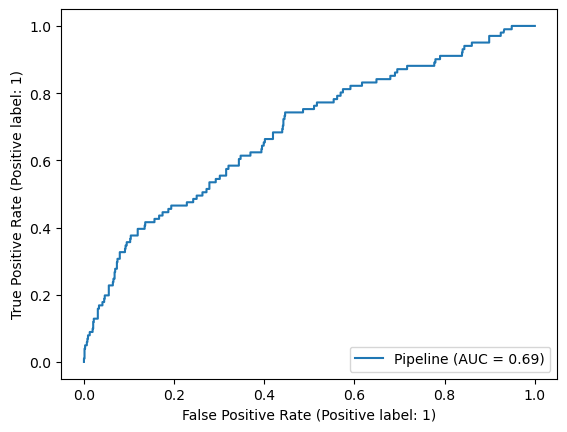

In [96]:
RocCurveDisplay.from_estimator(rf_best_smt_tmk, X_test, y_test)

#### Choosing Random OverSampling with Random Forest as we want the precision to be high so that we can identify that how many clients the model has predicted correctly that they will subscribe for a term deposit so that it does lead to resource and time loss of the company due to phone calls to client who will not subscribe for a term deposit.

### Fine Tuning the model

In [97]:
cv_df = pd.DataFrame(model_os.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_classifier__max_depth,param_classifier__max_features,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022777,0.008428,0.002963,0.001997,LogisticRegression(),0.0001,l1,liblinear,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,396,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
1,0.013895,0.003407,0.002922,0.000742,LogisticRegression(),0.0001,l2,liblinear,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.640449,0.617978,0.601124,0.614767,0.610754,0.617014,0.013014,365,0.615369,0.615169,0.621388,0.619783,0.618178,0.617978,0.002434
2,0.008586,0.001448,0.002091,0.000548,LogisticRegression(),0.000264,l1,liblinear,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,396,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
3,0.009161,0.002624,0.001912,0.000910,LogisticRegression(),0.000264,l2,liblinear,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.649278,0.630819,0.605939,0.611557,0.626806,0.624880,0.015300,363,0.622191,0.623997,0.628612,0.629815,0.623395,0.625602,0.003030
4,0.014223,0.007284,0.007375,0.005676,LogisticRegression(),0.000695,l1,liblinear,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,396,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [98]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_classifier__max_depth,param_classifier__max_features,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
346,0.788110,0.028119,0.039399,0.002913,"RandomForestClassifier(max_depth=17, max_featu...",NaN,NaN,NaN,17,6,130,{'classifier': RandomForestClassifier(max_dept...,0.968700,0.971910,0.973515,0.977528,0.969502,0.972231,0.003154,1,0.998796,0.997392,0.997793,0.998796,0.998194,0.998194,0.000553
349,1.180305,0.039822,0.059140,0.002673,"RandomForestClassifier(max_depth=17, max_featu...",NaN,NaN,NaN,17,6,190,{'classifier': RandomForestClassifier(max_dept...,0.967095,0.971910,0.976726,0.975923,0.968700,0.972071,0.003812,2,0.998194,0.996990,0.998596,0.998395,0.997793,0.997994,0.000568
345,0.682652,0.073374,0.035112,0.004433,"RandomForestClassifier(max_depth=17, max_featu...",NaN,NaN,NaN,17,6,110,{'classifier': RandomForestClassifier(max_dept...,0.967095,0.972713,0.975120,0.974318,0.964687,0.970787,0.004142,3,0.998194,0.997191,0.997592,0.998596,0.996790,0.997673,0.000654
347,0.904017,0.069700,0.045716,0.003545,"RandomForestClassifier(max_depth=17, max_featu...",NaN,NaN,NaN,17,6,150,{'classifier': RandomForestClassifier(max_dept...,0.964687,0.970305,0.974318,0.975923,0.965490,0.970144,0.004523,4,0.998796,0.997592,0.998194,0.998796,0.996388,0.997953,0.000901
348,1.043564,0.044269,0.052599,0.005415,"RandomForestClassifier(max_depth=17, max_featu...",NaN,NaN,NaN,17,6,170,{'classifier': RandomForestClassifier(max_dept...,0.968700,0.967095,0.975120,0.973515,0.966292,0.970144,0.003531,4,0.999398,0.997191,0.998596,0.998395,0.998194,0.998355,0.000711


In [99]:
sel_cols = ['param_classifier__max_depth','param_classifier__max_features','param_classifier__n_estimators', 'rank_test_score', 'mean_train_score', 'mean_test_score']

In [100]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_classifier__max_depth,param_classifier__max_features,param_classifier__n_estimators,rank_test_score,mean_train_score,mean_test_score
346,17,6,130,1,0.998194,0.972231
349,17,6,190,2,0.997994,0.972071
345,17,6,110,3,0.997673,0.970787
347,17,6,150,4,0.997953,0.970144
348,17,6,170,4,0.998355,0.970144
344,17,6,90,6,0.997873,0.969663
343,17,6,70,7,0.997913,0.969342
342,17,6,50,8,0.998034,0.968860
353,17,11,70,9,0.998555,0.966774
357,17,11,150,10,0.998796,0.966613


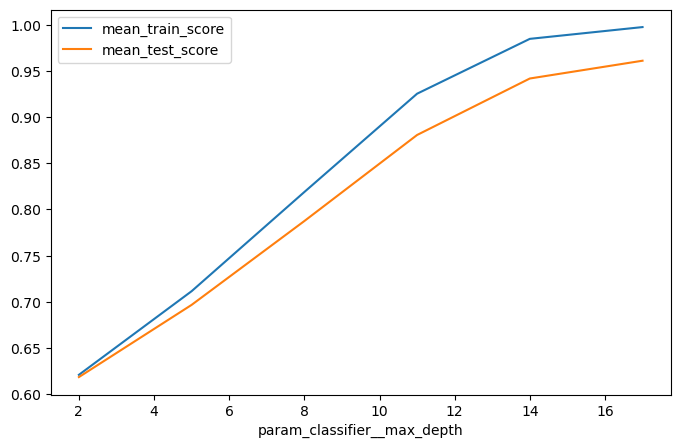

In [101]:
cv_df.groupby('param_classifier__max_depth')['mean_train_score', 'mean_test_score'].mean().plot(figsize=[8,5])
plt.show()

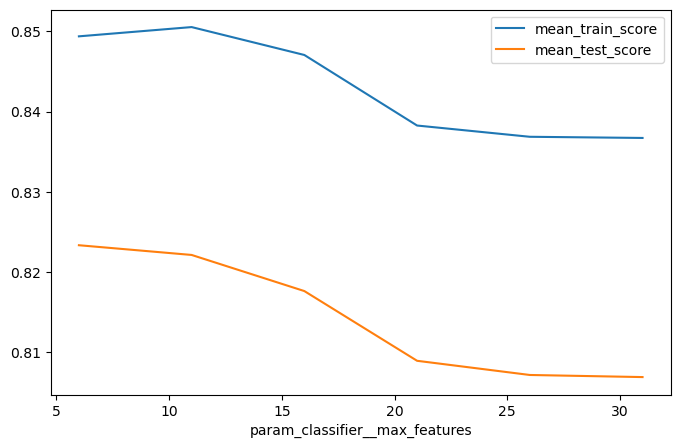

In [102]:
cv_df.groupby('param_classifier__max_features')['mean_train_score', 'mean_test_score'].mean().plot(figsize=[8,5])
plt.show()

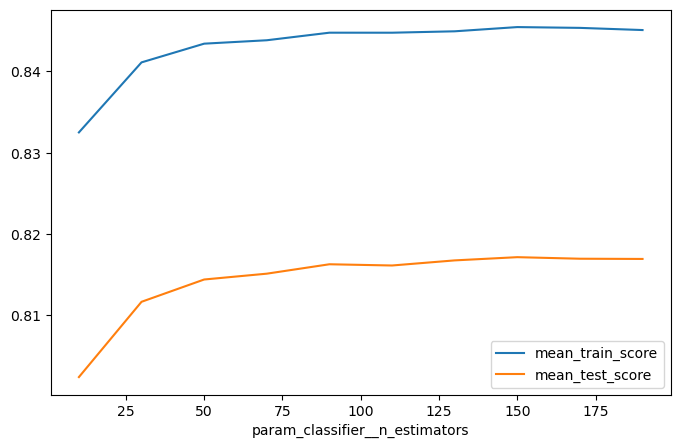

In [103]:
cv_df.groupby('param_classifier__n_estimators')['mean_train_score', 'mean_test_score'].mean().plot(figsize=[8,5])
plt.show()

In [104]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [105]:
params = {
    'max_depth': list(range(10, 30, 5)),
    'n_estimators': list(range(100, 250, 20)),
    'max_features': list(range(4, 25, 2))
}

In [106]:
model = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, return_train_score=True)

In [107]:
%%time
model.fit(X_resampled_os, y_resampled_os)

Fitting 4 folds for each of 352 candidates, totalling 1408 fits
CPU times: user 4.32 s, sys: 837 ms, total: 5.15 s
Wall time: 8min 4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                          24],
                         'n_estimators': [100, 120, 140, 160, 180, 200, 220,
                                          240]},
             return_train_score=True, verbose=1)

In [117]:
model.best_estimator_

RandomForestClassifier(max_depth=25, max_features=4, n_estimators=220,
                       n_jobs=-1, random_state=42)

In [118]:
model.best_score_

0.9778485995994733

In [119]:
best_model = model.best_estimator_

In [120]:
y_pred = best_model.predict(X_test)

In [121]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8830874006810443
F1 score:  0.2695035460992908
Recall:  0.18811881188118812
Precision:  0.475

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       780
           1       0.47      0.19      0.27       101

    accuracy                           0.88       881
   macro avg       0.69      0.58      0.60       881
weighted avg       0.85      0.88      0.86       881


 confussion matrix:
 [[759  21]
 [ 82  19]]


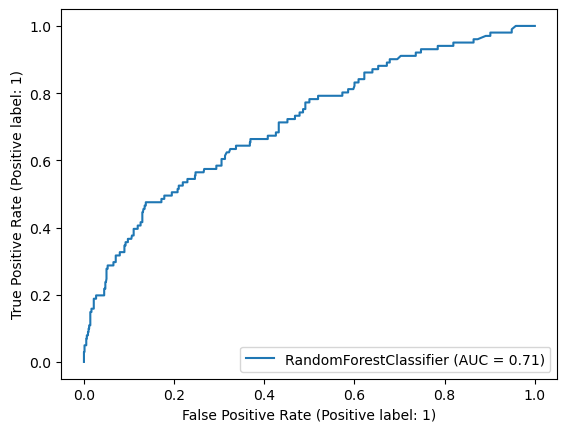

In [122]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test)

## Feature Importance 

In [114]:
df = pd.DataFrame({'Features': model.feature_names_in_,'Importance': model.best_estimator_.feature_importances_})

In [115]:
df.sort_values(by = 'Importance', ascending = False)

,Features,Importance
2,balance,0.211020
0,age,0.180892
5,month,0.109994
6,campaign,0.088516
7,pdays,0.066093
1,education,0.048189
23,poutcome_success,0.041716
21,contact_unknown,0.038544
19,marital_married,0.030287
3,housing,0.027883
